# Connect4 mit Reinforcement Learning
* #### Teamprojekt von Rituraj Singh und Kevin Bücher im SS21
* #### Eingereicht bei - Prof. Dr. rer. nat. Grüning, André

### Inhalt
* Reinforcement Learning
* Connect4-Umgebung
* Markov Decision Processes
* Exploration vs. Exploitation
* Lösungsansatz 1
* Lösungsansatz 2
* Ergebnisse der Lösungsansätze

# ***Reinforcement Learning***
* ein Bereich des maschinellen Lernens,der sich darauf konzentriert,wie etwas in einer Umgebung handeln könnte, um eine bestimmte Belohnung zu maximieren
* Algorithmen des Reinforcement Learning untersuchen das Verhalten von Subjekten in solchen Umgebungen und lernen, dieses Verhalten zu optimieren.

## ***Connect4-Umgebung***
<br><br>
<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Connect_Four.gif/220px-Connect_Four.gif" alt="Image of RL Agents" width="400"/></center>

* Connect Four ist ein Verbindungs-Brettspiel für zwei Spieler, bei dem die Spieler eine Farbe wählen und dann abwechselnd farbige Scheiben in ein siebenspaltiges, sechsreihiges, vertikal hängendes Gitter fallen lassen. Die Spielsteine fallen gerade nach unten und nehmen den untersten verfügbaren Platz innerhalb der Spalte ein. Ziel des Spiels ist es, als Erster eine horizontale, vertikale oder diagonale Linie aus vier eigenen Scheiben zu bilden.

### ***Markov Decision Processes (MDPs)***
Markov Decision Process ist ein Prozess der Strukturierung eines Reinforcement Learning Problems.Komponenten des MDP sind
* Agent
* Umgebung - Connect 4 
* Zustand
* Aktion
* Belohnung

<center><img src="https://deeplizard.com/images/MDP-diagram.jpg" alt="Image of RL Agents" width="800"/></center>
<center>https://deeplizard.com/images/MDP-diagram.jpg <center>

<center><img src="mdp.png" alt="Image of RL Agents" width="800"/></center>
<center>Quelle - https://deeplizard.com/learn/video/my207WNoeyA <center>

## ***Q-Learning***
* Q-learning ist eine Technik, die die optimale Strategie in einem MDP lösen kann.Das Ziel des Q-Learnings ist es, eine Strategie zu finden, die in dem Sinne optimal ist, dass der erwartete Wert der Gesamtbelohnung über alle aufeinanderfolgenden Schritte das maximal erreichbare ist.

**Voraussetzungen für Q-Lernen:**
* ***Optimal Policy*** - das beste aller Mappings von jedem Zustand im Zustandsraum auf die Wahrscheinlichkeiten der Durchführung jeder möglichen Aktion aus jedem Zustand.
* ***Q-Tabelle*** - Q-Tabelle speichert die Q-Werte für jedes Zustands-Aktionspaar. Die horizontale Achse der Tabelle stellt die Aktionen dar, die vertikale Achse die Zustände. Die Dimensionen der Tabelle sind also die Anzahl der Aktionen mal die Anzahl der Zustände.

**Voraussetzungen für Q-Lernen:**
* ***Wert-Iteration*** -
<br>\begin{eqnarray*} q_{\ast }\left( s,a\right) &=&E\left[ R_{t+1}+\gamma \max_{a^{\prime }}q_{\ast }\left( s^\prime,a^{\prime }\right)\right] \end{eqnarray*}
Der Q-Lernalgorithmus aktualisiert iterativ die Q-Werte für jedes Zustands-Aktionspaar unter Verwendung der Bellman-Gleichung, bis die Q-Funktion gegen die optimale Q-Funktion konvergiert, q*. Dieser Ansatz wird Wert-Iteration genannt. 

<center><img  src="https://www.baeldung.com/wp-content/uploads/sites/4/2020/12/q-learning-Q-table.png" alt="Image of Q-Table" width="500"/></center><br>
<center>Q-Tabelle zum Speichern von Zustands-Aktionspaaren</center>

## ***Exploration vs. Exploitation***
* ***Exploration*** - der Akt der Erkundung der Umgebung, um Informationen über sie herauszufinden. 
* ***Exploitation*** - der Akt der Ausnutzung der Informationen, die bereits über die Umgebung bekannt sind, um den Ertrag zu maximieren.

## ***Lösungsansätze***

Basierend auf Exploration und Exploitation hatten wir zwei Ansätze verfolgt, um connect4 mit Reinforcement Learning zu lösen

***Ansatz 1***<br>
in unserem ersten Ansatz zur Lösung des connect4-Problems beginnen die Agenten mit einem niedrigen Explorationsfaktor und mit jeder Episode erhöht sich der Explorationsfaktor, was dem Agenten erlaubt, mehr zu erkunden.

In [4]:
# pip installs and extensions 
#!pip install jupyter_contrib_nbextensions
#!pip install RISE
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextensionjupyter nbextension enable --py widgetsnbextension

In [6]:
# imports
from ipywidgets import HTML, Button, GridBox, Layout, ButtonStyle
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random

# ***Interaktive Connect4-Umgebung***

mit Hilfe dieser interaktiven Umgebung können menschliche Spieler gegeneinander spielen

In [7]:
rows=6 
cols =7
board=np.zeros((rows,cols))
#board ####________________####

green_holes=[
                         Button(
                             layout=Layout(width='auto', height='auto'),
                             description=str(int(board[i//cols][i%cols])),  
                             disabled=False,
                             style=ButtonStyle(button_color='#EFEFEF')
                         ) for i in range(rows*cols)
                 ]
buttons=[
                         Button(
                             layout=Layout(width='auto', height='auto'),
                             description=str(int(i%cols)),  
                             disabled=False,
                             style=ButtonStyle(button_color='#bc8f8f')
                         ) for i in range(1*cols)
                 ]


board_config=green_holes+buttons

# setup the board enviroment #
board_env=GridBox(children=board_config,
        layout=Layout(
            width='30%',
            grid_template_columns='repeat('+str(cols)+', 40px)',
            grid_template_rows='repeat('+str(rows+1)+', 40px)',
            grid_gap='1px 1px'))

# board state checking functions
def square_winner(square):
        s = np.append([np.sum(square, axis=0), np.sum(square, axis=1).T],
                      [np.trace(square), np.flip(square,axis=1).trace()])
        if np.max(s) == 4:
            winner_tag = 1
        elif np.min(s) == -4:
            winner_tag = -1
        else:
            winner_tag = None
        return winner_tag


def game_winner(state):
        winner = None
        find = False
        for i in range(len(state[:,0])-3):
            for j in range(len(state[0, :])-3):
                winner = square_winner(state[i:i+4, j:j+4])
                if winner is not None:
                    print('Winner is: Player-', winner)
                    #self.print_game()
                    find = True 
                    break
            if find: 
                break  

        if np.min(np.abs(state[0, :])) != 0:
            winner = 0
            print('no winner')

        return winner
    
player1_turn=True 
# player1_turn=True for player-1 and player1_turn=False for player-2
# +1 for player-1 and -1 for player-2 
# yellow denotes player-1 und red player-2
def drop_piece(turn, col_no):  
    global player1_turn
    row_no=np.where(board[:, col_no] == 0)[0][-1]
    tag=None
    bg_color=None
    if player1_turn: # then its turn for player-1            
        tag=1
        bg_color="#FEF600" #yellow
        #Switch the turn for next iteration
        player1_turn=False
    else: # then its turn for player-2            
        tag=-1
        bg_color="#FE1B00" # red
        #Switch the turn for next iteration
        player1_turn=True
    
    board[row_no][col_no]=tag
    # equivalent button_number
    button_no=cols*row_no+col_no    
    green_holes[button_no].description=str(tag)
    green_holes[button_no].style=ButtonStyle(button_color=bg_color)
    
def on_button_clicked(b):    
    col_no=int(b.description)
    drop_piece(player1_turn, col_no)
    game_winner(board)       
        
for child_button in buttons:
    child_button.on_click(on_button_clicked)

In [8]:
board_env

GridBox(children=(Button(description='0', layout=Layout(height='auto', width='auto'), style=ButtonStyle(button…

In [9]:
board

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

# ***Ansatz 1***

<center><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/678cb558a9d59c33ef4810c9618baf34a9577686" alt="Image of RL Agents" width="1000" height="300"/></center>
<hr>

In [ ]:
def choose_move(self,state, winner):           

    exploration_rate_threshold = random.uniform(0, 1)

    ava_moves = self.ava_moves(state)
    
    if exploration_rate_threshold > self.exp_factor:  
        idx = np.argmax(self.q_table[np.array_str(state)])
        if idx in ava_moves:
            pass
        else:
            idx = random.choice(ava_moves)                

    else: 
        idx = random.choice(ava_moves) 
    return idx 

#### RL_Agent

In [29]:
"""
RL_Agent is the reinforcement learning agent.
--- Important functions ---
1. update_exp_factor - Once an episode is finished, we need to update our exploration_rate using exponential decay, 
which just means that the exploration rate decreases or decays at a rate proportional to its current value.
2. update_qtable - makes the transition from previous to new state and updates the qtable's state-action pair
3. choose_move - chooses the optimal move based on current state 
""" 
class RL_Agent:

    def __init__(self, tag, exploration_factor=0.99):
        self.tag = tag
        self.exp_factor = exploration_factor
        self.learning_rate = 0.1
        self.discount_rate = 0.99        
        self.max_exploration_rate = 1
        self.min_exploration_rate = 0.01
        self.exploration_decay_rate = 0.01
        self.env_action_space=7        
        self.q_table=defaultdict(lambda: np.zeros(self.env_action_space)) # dictionary 
        self.rewards_all_episodes = []
        self.rewards_current_episode = 0
        self.q_table_state_space_per_ep=[]
        
        
    def get_the_average_rewards_as_x_y(self,per_ep,num_episodes):
        # Calculate and print the average reward per per_ep episodes
        rewards_per_thousand_episodes = np.split(np.array(self.get_rewards_all_episodes()),num_episodes/per_ep)
        count = per_ep      
        x=np.arange(0,num_episodes,per_ep)+per_ep
        y=[]
        for r in rewards_per_thousand_episodes:
            y.append(sum(r/per_ep))

        return x,y
    
    def update_exp_factor(self,episode):
        # when the episode has ended
        # update the exp_factor
        self.exp_factor = self.min_exploration_rate + (self.max_exploration_rate - self.min_exploration_rate) * np.exp(-self.exploration_decay_rate*episode)
        # since the episode has ended we collect rewards 
        self.rewards_all_episodes.append(self.rewards_current_episode)
        # set current episode reward to 0 for the next episode
        self.rewards_current_episode = 0
        # and collect the size of q_table at the end of this episode
        self.q_table_state_space_per_ep.append(len(self.q_table))
        
    def ava_moves(self, state): # checks available moves
        return np.where(state[0, :] == 0)[0]
    
    
    def get_rewards_all_episodes(self): # gets all the reward points collected by the agent
        #self.print_qtable()
        #self.plot_q_table_state_space()
        return self.rewards_all_episodes
    
    def get_q_table_state_space_per_ep(self):
        return self.q_table_state_space_per_ep
          
    def update_qtable(self,prev_state,new_state,action,reward):
        # this q_table implementation has to be implemented with default dictionaries
        # use the q_table above
        prev_state,new_state=np.array_str(prev_state),np.array_str(new_state)
        self.q_table[prev_state][action] = self.q_table[prev_state][action] * (1 - self.learning_rate) + self.learning_rate * (reward + self.discount_rate * np.max(self.q_table[new_state]))
        self.rewards_current_episode += reward
        #print(self.rewards_current_episode)

    def print_qtable(self):
        print("q_table of by player-"+str(self.tag))
        for k,v in self.q_table.items():
            print (f"{k} - {v}")
        
    def choose_move(self,state, winner):  #           
        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        # at starting the Agent will frequently explore the env and later shud start exploiting it as well        
        # calculate available moves ##
        ava_moves = self.ava_moves(state)
        if exploration_rate_threshold > self.exp_factor: # then exploit the env --> use Qtable or memory info 
            idx = np.argmax(self.q_table[np.array_str(state)])  #self.choose_optimal_move(state)
            if idx in ava_moves:
                #print("!!! Used the q_table content !!!")
                pass
            else:
                idx = random.choice(ava_moves)                
            
            
        else: # then explore the enviroment --> randomly sample a move from available moves 
            # when self.exp_factor=1 then all the time moves are randomly sampled 
            idx = random.choice(ava_moves) # that is the agent always explores the enviroment  
        return idx # return choosen move

    

####  Connect-4 Enviroment

In [30]:
"""
connect4_enviroment is the connect4 enviroment
--- Important functions ---
1. make_state_from_move - Returns a new state by making a transition to a new state from prev state using the choosen move.
2. game_winner - check if any of the two players won the game or was it a draw 
3. square_winner - to find row,col,diagonal of 4. game_winner uses this function to find the winner in a particular state
4. reward - rewards returned by the enviroment when an action has been taken by the agent
5. play_game - this function plays the game untill the episode ends.
6. play_multiple_games - plays multiple episodes of the game and collect stats
7. plot_both_players_rewards - plots average rewards per episode collected by both the agents
8. plot_both_players_q_table_state_space - plots q table state spce explored by both the agents

"""  
class connect4_enviroment:
    def __init__(self, player1, player2, exp1=1, exp2=1, tag1=1, tag2=2):

        self.players = {1: player1(tag1, exploration_factor=exp1),
                        2: player2(tag2, exploration_factor=exp2)}
        self.state, self.winner, self.turn = np.zeros((6, 7)), None, 1        
        
        

    def play_game(self):        
        move_count = 0
        
        while self.winner is None:
            # select the particular player
            player = self.players[self.turn]
            # save prev_state
            prev_state=self.state
            # player makes the move or the action
            action = player.choose_move(prev_state, self.winner)
            #move = self.play_move()            
            #self.state = self.make_state_from_move(move) # creates a new state
            
            # note that self.state also contains the new_state
            # enviroment reacts to action
            new_state, reward = self.step(action) # this is equivalent to env.step(action in frozen lake example)
            
            player.update_qtable(prev_state,new_state,action,reward) # update qtable with help of prev_state ,new_State and reward
            #self.rewards_current_episode += reward
            self.next_player()
            move_count += 1

        return self.winner, move_count
    
    def step(self,action):        
        self.state = self.make_state_from_move(action) # get new state
        self.game_winner() # check winner on new state        
        return self.state,self.reward(self.winner) # return newstate and reward according the current player's turn
        
       

    def play_multiple_games(self, episodes,per_ep):
        statistics = {1: 0, 2: 0, 0: 0, 'move_count': 0}
        move_count_total = []
        
        for i in range(episodes): # while playing multiple games the players will switch turns
            #print("*****EPISODE ", i+1, "*****\n")            
            winner, move_count = self.play_game() 
             
            move_count_total.append(move_count)
            statistics[winner] = statistics[winner] + 1
            ## then both the players update there respective exploration factor and collect rewards
            self.both_players_update_expNreward(i)
            # reset the enivoment at the end of episode
            self.reset()                       
            #print("\n*****END EPISODE *****\n")

        statistics['move_count'] = np.mean(move_count_total)        
        
        self.plot_both_players_rewards(episodes,per_ep)        
        return statistics
    
    
    def both_players_update_expNreward(self,i): # i is the ith episode
        self.players[1].update_exp_factor(i)
        self.players[2].update_exp_factor(i)  
    
    def plot_game_stats(self,statistics): # episodes   
        labels = ['player-1 wins', 'player-2 wins', 'Draws']
        sizes = [statistics[1], statistics[2], statistics[0]]
        fig1, ax1 = plt.subplots(figsize=(6,4))
        ax1.set_title('Game stats')
        for i in range(len(labels)):
            ax1.text(i,sizes[i],str(sizes[i]),ha="center",va="bottom")
        ax1.bar(labels,sizes)           
        
    def plot_both_players_q_table_state_space(self):
        q_table_state_space_per_ep_player_1=self.players[1].get_q_table_state_space_per_ep()
        q_table_state_space_per_ep_player_2=self.players[2].get_q_table_state_space_per_ep()
        print("q_table state space explored by player-",1 ," : ",q_table_state_space_per_ep_player_1[-1])        
        print("__________________________________________________________________________")
        
        print("q_table state space explored by player-",2 ," : ",q_table_state_space_per_ep_player_2[-1])        
        print("__________________________________________________________________________")
        
        x1=np.arange(len(q_table_state_space_per_ep_player_1))+1
        y1=q_table_state_space_per_ep_player_1
        x2=np.arange(len(q_table_state_space_per_ep_player_2))+1
        y2=q_table_state_space_per_ep_player_2           
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
        #fig.suptitle('Horizontally stacked subplots')
        ax1.plot(x1, y1, color='orange', linestyle='dashed',linewidth=2)
        ax1.set_title("q_table_state_space explored by Player-1")
        ax2.plot(x2, y2, color='red', linestyle='dashed',linewidth=2)
        ax2.set_title("q_table_state_space explored by Player-2")
        
        
        
    def plot_both_players_rewards(self,episodes,per_ep):
        x1,y1=self.players[1].get_the_average_rewards_as_x_y(per_ep,episodes)
        x2,y2=self.players[2].get_the_average_rewards_as_x_y(per_ep,episodes)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
        #fig.suptitle('Horizontally stacked subplots')
        ax1.plot(x1, y1, color='orange', marker='o', linestyle='dashed',linewidth=2, markersize=4)
        ax1.set_title("Average Rewards per "+str(per_ep)+" episodes Player-1")
        ax2.plot(x2, y2, color='red', marker="s", linestyle='dashed',linewidth=2, markersize=4)
        ax2.set_title("Average Rewards per "+str(per_ep)+" episodes Player-2")

    
    def make_state_from_move(self, move): # equivalent to env.step(action) 
        if move is None:
            return self.state

        state = np.array(self.state)
        if self.turn == 1:
            tag = 1
        else:
            tag = -1

        #if len(np.where(state[:, move] == 0)[0]) == 0:
            #print(state)
        idy = np.where(state[:, move] == 0)[0][-1]
        state = np.array(state)
        state[idy, move] = tag        
        
        #print(self.winner)
        return state

    def reward(self, winner):
        if winner is self.turn: # self.tag from RLAgent is changed to self.tirn in here
            reward = 100
        elif winner is None:
            reward = 0
        elif winner == 0:
            reward = 50
        else:
            reward = -100
        #print(winner,"  ",reward)
        return reward

    def next_player(self): # switches the turns
        if self.turn == 1:
            self.turn = 2
        else:
            self.turn = 1

    def game_winner(self):        
        rows=len(self.state[:,0])
        cols=len(self.state[0, :])
        done = False 
        for i in range(rows-3):
            for j in range(cols-3):
                # find row of 4   
                self.winner=self.square_winner(self.state[i:i+4, j:j+4])
                if self.winner is not None:
                    #print('Winner is: Player-', self.winner)
                    #self.print_game()
                    done = True 
                    break
            if done: 
                break        


        if np.min(np.abs(self.state[0, :])) != 0:
            self.winner = 0
            #print('***********************No winner*******************************************************')
        #self.print_game()
        

    def square_winner(self, square):        
        s = np.append([np.sum(square, axis=0), np.sum(square, axis=1).T],
                      [np.trace(square), np.flip(square,axis=1).trace()])
        winner = None
        if np.max(s) == 4:
            winner = 1
        elif np.min(s) == -4:
            winner = 2        
           
        return winner

    def print_game(self):
        print(self.state)        
    
    def reset(self):
        self.state, self.winner, self.turn = np.zeros((6, 7)), None, 1
        return self.state
      


##### Ausgänge bei geringer Anzahl von Episoden
Hinweis : Untere Schranke für den Zustandsraum : 16.000.000.000.000 (<a href="https://web.stanford.edu/class/aa228/reports/2019/final106.pdf">gemäß dieser Forschungsarbeit</a>)

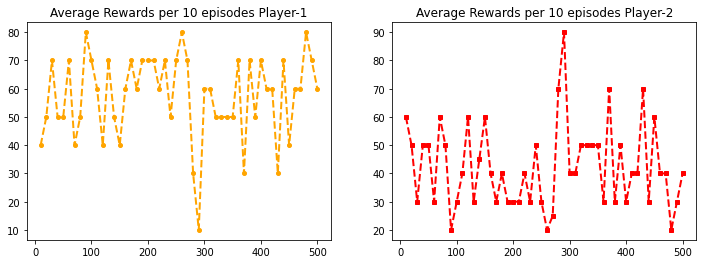

In [80]:
env1= connect4_enviroment(RL_Agent,RL_Agent)
env1_stats=env1.play_multiple_games(episodes=500,per_ep=10)

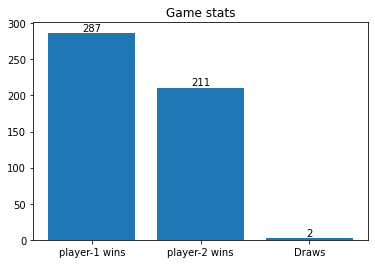

In [81]:
env1.plot_game_stats(env1_stats)

q_table state space explored by player- 1  :  8114
__________________________________________________________________________
q_table state space explored by player- 2  :  8039
__________________________________________________________________________


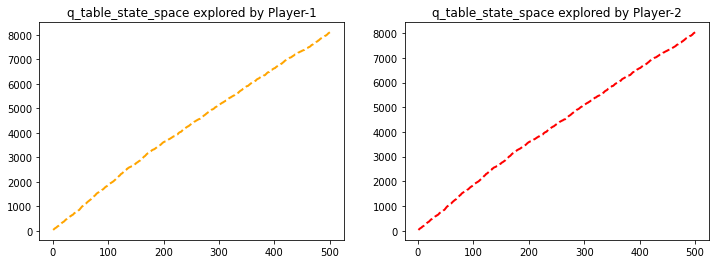

In [82]:
env1.plot_both_players_q_table_state_space()

##### Ausgänge bei hoher Anzahl von Episoden (50000 episodes)

In [ ]:
#env1= connect4_enviroment(RL_Agent,RL_Agent)
#env1_stats=env1.play_multiple_games(episodes=50000,per_ep=1000)

In [ ]:
#env1.plot_game_stats(env1_stats)

In [ ]:
#env1.plot_both_players_q_table_state_space()

q_table state space explored by player- 1 for 50000 episodes :  486684
__________________________________________________________________________
q_table state space explored by player- 2 for 50000 episodes :  484405
__________________________________________________________________________

<center><img src="avg-rewards.png" alt="Image of RL Agents" width="800"/></center>

<center><img src="game stats.png" alt="Image of RL Agents" width="400"/></center>

<center><img src="q_table_state_space.png" alt="Image of RL Agents" width="800"/></center>

### Ansatz 1 mit einer Million Durchgänge:

q_table state space explored by player- 1  :  6277507
__________________________________________________________________________
q_table state space explored by player- 2  :  6254126
__________________________________________________________________________


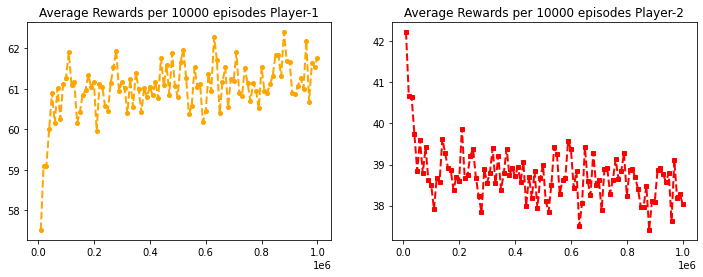

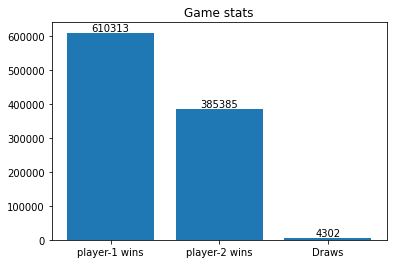

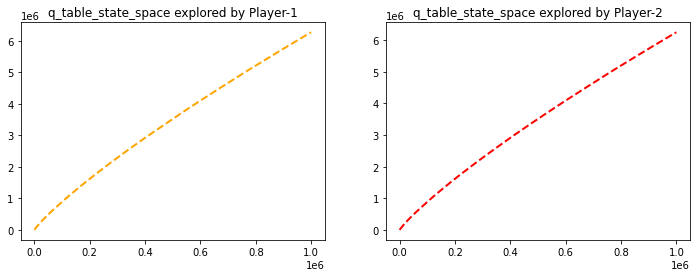

In [31]:
env1= connect4_enviroment(RL_Agent,RL_Agent)
env1_stats=env1.play_multiple_games(episodes=1000000,per_ep=10000)
env1.plot_game_stats(env1_stats)
env1.plot_both_players_q_table_state_space()

***Hinweis : Für verschiedene Ansätze mussten wir die Umgebungen und Agenten entsprechend konfigurieren.***

## ***Q-Learning mit E-Greedy***
***Ansatz 2***<br>
in unserem zweiten Ansatz haben wir die Epsilon-Greedy Methode verwendet, um ein Gleichgewicht zwischen Exploration und Exploitation herzustellen, indem zufällig zwischen Exploration und Exploitation gewählt wird.

<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/20200316215850/Screenshot-2020-03-16-at-9.58.10-PM.png" alt="Image of RL Agents" width="1000" height="300"/></center>

<center><img src="https://media.geeksforgeeks.org/wp-content/uploads/20200318200401/Screenshot-2020-03-18-at-8.03.38-PM.png" alt="Image of RL Agents" width="1000" height="300"/></center>

<center><img src="https://www.baeldung.com/wp-content/uploads/sites/4/2020/12/q-learning-epsilon-greedy-1.png" alt="Image of E-Greedy theory" width="400" align="center"/></center>

 # ***Ansatz 2*** 

Im folgenden werden die **wichtigsten Funktionen und Änderungen** zu Ansatz 1 gezeigt. (Die einzelnen Funktionen in einer Zelle brauchen **nicht** ausgeführt werden. Dafür bitte die **drei relevanten Klassen ausführen** (Agent + 2 Enviroment Klassen)!)

In [18]:
"""
Creates an epsilon-greedy policy based
on a given Q-function and epsilon.

Returns a function that takes the state
as an input and returns the probabilities
for each action in the form of a numpy array 
of length of the action space(set of possible actions).
"""   
def createEpsilonGreedyPolicy(self, Q, epsilon, num_actions):

    def policyFunction(state):

        Action_probabilities = np.ones(num_actions) * epsilon / num_actions

        best_action = np.argmax(self.Q[state])
        Action_probabilities[best_action] += (1.0 - epsilon)
        return Action_probabilities

    return policyFunction 


**(mögliche) Policy Funktion als Standardverteilung:**
<center><img src="distribution.png" alt="Prohability Distribution" width="400"/></center>

In [ ]:
"""
Q-Learning algorithm: Off-policy TD control.
Finds the optimal greedy policy while improving
following an epsilon-greedy policy
"""  
def qLearning(self, Q, next_state, action, winner, discount_factor = 1.0,
                            alpha = 0.6, epsilon = 0.1): 

    reward = self.reward(winner)

    # Update statistics
    #stats.episode_rewards[ith_episode] += reward
    #stats.episode_lengths[ith_episode] = t

    # TD Update
    best_next_action = np.argmax(self.Q[next_state]) 
    #best_actions[best_next_action] = best_actions[best_next_action] + 1

    self.Q[self.state][action] = ((1-alpha) * self.Q[self.state][action]) + (alpha * (reward + (discount_factor * self.Q[self.state][best_next_action]) - self.Q[next_state][action]))

    self.state = next_state

    return self.Q

In [ ]:
 """
Method to choose action according to the 
probability distribution from e greedy function.

Returns the choosen action. 
"""
def choose_move(self, state, winner):

    action_probabilities = policy(state.tobytes())

    self.action = np.random.choice(np.arange(len(action_probabilities)),p = action_probabilities)

    avaMoves = np.where(state[0, :] == 0)[0]
    while winner is None: 
        if self.action not in avaMoves:
            self.action = np.random.choice(np.arange(
                  len(action_probabilities)),
                   p = action_probabilities)
        else:
            break

    return self.action

## RLAgent mit E-Greedy Policy

In [2]:
import numpy as np
import random
import csv
import os
from collections import defaultdict


class RLAgent:

    def __init__(self, tag, epsilon=1):
        self.tag = tag
        self.epsilon = epsilon
        self.prev_state = np.zeros((6, 7))
        self.prev_move = -1
        self.state = None
        self.move = None
        self.count_memory = 0
        self.cache = []
        self.Q = defaultdict(lambda: np.zeros(7))
        self.alpha = 0.5
        self.gamma = 1
        self.policy = self.createEpsilonGreedyPolicy(self.Q, self.epsilon, 7)
        self.rewards_all_episodes = []
        
    
    """
    Creates an epsilon-greedy policy based
    on a given Q-function and epsilon.

    Returns a function that takes the state
    as an input and returns the probabilities
    for each action in the form of a numpy array 
    of length of the action space(set of possible actions).
    """     
    def createEpsilonGreedyPolicy(self, Q, epsilon, num_actions):

        def policyFunction(state):

            Action_probabilities = np.ones(num_actions) * epsilon / num_actions

            best_action = np.argmax(self.Q[state])
            Action_probabilities[best_action] += (1.0 - epsilon)
            return Action_probabilities

        return policyFunction 
    
    """
    Q-Learning algorithm: Off-policy TD control.
    Finds the optimal greedy policy while improving
    following an epsilon-greedy policy
    """  
    def qLearning(self, next_state, action, winner, discount_factor = 1.0,
                                alpha = 0.6, epsilon = 0.1): 

        reward = self.reward(winner)

        # Update statistics
        #stats.episode_rewards[ith_episode] += reward
        #stats.episode_lengths[ith_episode] = t

        # TD Update
        best_next_action = np.argmax(self.Q[next_state]) 
        #best_actions[best_next_action] = best_actions[best_next_action] + 1

        self.Q[self.state][action] = ((1-alpha) * self.Q[self.state][action]) + (alpha * (reward + (discount_factor * self.Q[self.state][best_next_action]) - self.Q[next_state][action]))

        self.state = next_state

        return self.Q
    
    """
    Method to choose action according to the 
    probability distribution from e greedy function.
    
    Returns the choosen action. 
    """
    def choose_move(self, state, winner):

         # get probabilities of all actions from current state
        action_probabilities = self.policy(state.tobytes())

        # choose action according to 
        # the probability distribution
        self.action = np.random.choice(np.arange(len(action_probabilities)),p = action_probabilities)
        #actions[self.action] = actions[self.action] + 1

        avaMoves = np.where(state[0, :] == 0)[0]
        while winner is None: 
            if self.action not in avaMoves:
                self.action = np.random.choice(np.arange(
                      len(action_probabilities)),
                       p = action_probabilities)
            else:
                break
                    
        return self.action

    """
    Method to give rewards to the agent by the current winner. 
    In our first version we noticed that with a 0 reward the 
    q table is packed with more 0 values, so that with a 1-reward 
    for a standard move it is stored with very low value but not 0. 
    1 = no winner yet
    50 = draw
    100 = own win
    -100 = opponents win
    
    Returns the reward as number between -100, 1, 50 or 100.
    """
    def reward(self, winner):

        if winner is self.tag:
            reward = 100
        elif winner is None:
            reward = 1
        elif winner == 0:
            reward = 50
        else:
            reward = -100
                
        self.rewards_all_episodes.append(reward)
        return reward

    """
    Method to check the winner of the current state.
    
    Returns winner (1 - player one, 2 - player two, 
    0 - draw, none - no winner)
    """
    def game_winner(self, state):
        winner = None
        for i in range(len(state[:,0])-3):
            for j in range(len(state[0, :])-3):
                winner = self.square_winner(state[i:i+4, j:j+4])
                if winner is not None:
                    # print('winner is:', self.winner)
                    break
            if winner is not None:
                # print('winner is:', self.winner)
                break

        if np.min(np.abs(state[0, :])) != 0:
            winner = 0
            # print('no winner')

        return winner

    @staticmethod
    def ava_moves(state):
        moves = np.where(state[0, :] == 0)[0]
        return moves
    
    """
    Method to check the winner of the current square 
    of the state (see "game_winner").
    
    Returns winner (1 - player one, 2 - player two,
    0 - draw, none - no winner)
    """
    def square_winner(square):
        s = np.append([np.sum(square, axis=0), np.sum(square, axis=1).T],
                      [np.trace(square), np.flip(square,axis=1).trace()])
        if np.max(s) == 4:
            winner = 1
        elif np.min(s) == -4:
            winner = 2
        else:
            winner = None
        return winner

    def get_the_average_rewards_as_x_y(self,per_ep,num_episodes):
        # Calculate and print the average reward per per_ep episodes
        rewards_per_thousand_episodes = np.split(np.array(self.rewards_all_episodes),num_episodes/per_ep)
        count = per_ep      
        x=np.arange(0,num_episodes,per_ep)+per_ep
        y=[]
        for r in rewards_per_thousand_episodes:
            y.append(sum(r/per_ep))

        return x,y
    
    """
    Method to create the new state by a new action/move.
    
    Returns new state (6x7 matrix)
    """
    @staticmethod
    def make_state_from_move(state, move, player):
        if move is None:
            return state

        state = np.array(state)
        if player == 1:
            tag = 1
        else:
            tag = -1
            
        idy = np.where(state[:, move] == 0)[0][-1]
        state = np.array(state)
        state[idy, move] = tag

        return state

## Spielumgebung mit E-Greedy Policy Analyse

Die folgenden Spielumgebungen sind in unserer zweiten Version leicht verändert worden. Der Grund sind Vereinfachungen von Methoden und angepasste Analyse für den E-Greedy Agenten.

In [3]:
#from agent_RL import *
from abc import abstractmethod
import matplotlib.pyplot as plt


class GameEnviroment:

    def __init__(self, player1, player2, exp1=1, exp2=1, tag1=1, tag2=2):

        self.players = {1: player1(tag1, epsilon=exp1),
                        2: player2(tag2, epsilon=exp2)}

        self.state, self.winner, self.turn = self.init_game()
        self.memory = {}
        self.p1_wins = []
        self.p2_wins = []
        self.draws = []
        self.p1_win = 0
        self.p2_win = 0
        self.draw = 0
        self.episodes = 100

    """
    Method of playing a game until someone wins.
    
    Returns winner (1 - player one, 2 - player two, 0 - draw) 
    and total number of actions/moves in this game
    """
    def play_game(self):

        move_count = 0
        while self.winner is None:
            self.game_winner()
            move = self.play_move()

            if self.winner is None:
                self.state = self.make_state_from_move(move)
            
            self.next_player()
            move_count += 1

        # we have to call both methods again after somone wins to make sure every agent gets his rewards 
        self.play_move()
        self.next_player()
        #self.play_move()
        #self.next_player()

        return self.winner, move_count

    """
    Method of playing one Move in a game. Alternating 
    between the player turns
    
    Returns the choosen move by a player
    """
    def play_move(self):
        player = self.players[self.turn]
        move = player.choose_move(self.state, self.winner)
        if isinstance(player, RLAgent):
            player.qLearning(self.state.tobytes(), move, self.winner)
        return move
    
    def printAdditionalStatistics(self):        
        plt.ylabel('Game outcomes in %')
        plt.xlabel('Game number')
        plt.plot(range(episodes), self.draws, 'r-', label='Draw')
        plt.plot(range(episodes), self.p1_wins, 'g-', label='Player 1 wins')
        plt.plot(range(episodes), self.p2_wins, 'b-', label='Player 2 wins')
        plt.legend(loc='best', shadow=True, fancybox=True, framealpha =0.7)
        #plt.plot(count, best_actions, 'b-', label='Best next action')
        plt.show()
        
        countQValues = 0
        for key in self.players[1].Q: 
            Q = self.players[1].Q
            # print(Q[key])
            for i in Q[key]:
                if i != 0.:
                    countQValues += 1
        
        print("% of all actions used and associated states: " + str((countQValues/(len(self.players[1].Q)*7))*100) + "%")
    
    
    def plot_both_players_rewards(self,episodes,per_ep):
        x1,y1=self.players[1].get_the_average_rewards_as_x_y(per_ep,episodes)
        x2,y2=self.players[2].get_the_average_rewards_as_x_y(per_ep,episodes)
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
        #fig.suptitle('Horizontally stacked subplots')
        ax1.plot(x1, y1, color='orange', marker='o', linestyle='dashed',linewidth=2, markersize=4)
        ax1.set_title("Average Rewards per "+str(per_ep)+" episodes Player-1")
        ax2.plot(x2, y2, color='red', marker="s", linestyle='dashed',linewidth=2, markersize=4)
        ax2.set_title("Average Rewards per "+str(per_ep)+" episodes Player-2")
        
        
    """
    Method of playing multiple games according to the number 
    of the episodes specified.
    
    Returns the statistics of all games
    """
    def play_multiple_games(self, episodes):
        
        q_counter = 0
        statistics = {1: 0, 2: 0, 0: 0, 'move_count': 0}
        move_count_total = []
        for i in range(episodes):
            self.episodes = i + 1
            winner, move_count = self.play_game()
            move_count_total.append(move_count)
            statistics[winner] = statistics[winner] + 1

            self.state, self.winner, self.turn = self.init_game()

        #self.plot_both_players_rewards(episodes, episodes/10.0)
        self.printAdditionalStatistics()
        return statistics

    @abstractmethod
    def init_game(self):
        pass

    @abstractmethod
    def make_state_from_move(self, move):
        pass

    @abstractmethod
    def next_player(self):
        pass

    @abstractmethod
    def game_winner(self):
        pass

    @abstractmethod
    def print_game(self):
        pass


In [4]:
import numpy as np


class ConnectFourEnviroment(GameEnviroment):

    def __init__(self, player1, player2, exp1=1, exp2=1, tag1=1, tag2=2):
        super().__init__(player1, player2, exp1, exp2, tag1, tag2)

    def init_game(self):
        return np.zeros((6, 7)), None, 1

    def make_state_from_move(self, move):
        if move is None:
            return self.state

        state = np.array(self.state)
        if self.turn == 1:
            tag = 1
        else:
            tag = -1

        idy = np.where(state[:, move] == 0)[0][-1]
        state = np.array(state)
        state[idy, move] = tag
        return state

    def next_player(self):
        if self.turn == 1:
            self.turn = 2
        else:
            self.turn = 1

    def game_winner(self):
        self.print_game()
        for i in range(len(self.state[:,0])-3):
            for j in range(len(self.state[0, :])-3):
                self.square_winner(self.state[i:i+4, j:j+4])
                if self.winner is not None:
                    #self.print_game()
                    print('winner is:', self.winner)
                    break
            if self.winner is not None:
                #self.print_game()
                print('winner is:', self.winner)
                break

        if np.min(np.abs(self.state[0, :])) != 0:
            self.winner = 0
            self.draw += 1
            
            #self.print_game()
            print('no winner')
            
        if self.winner is not None:
            self.p1_wins.append(self.p1_win*100.0/self.episodes)
            self.p2_wins.append(self.p2_win*100.0/self.episodes)
            self.draws.append(self.draw*100.0/self.episodes)

    def square_winner(self, square):
        s = np.append([np.sum(square, axis=0), np.sum(square, axis=1).T],
                      [np.trace(square), np.flip(square,axis=1).trace()])
        if np.max(s) == 4:
            self.winner = 1
            self.p1_win += 1
            
        elif np.min(s) == -4:
            self.winner = 2
            self.p2_win += 1
            
        else:
            self.winner = None
        return self.winner

    def print_game(self):

        print('  --------------')
        print(self.state)
        print('  --------------')


## Ausgaben des zweiten Ansatzes

* In der Ausgabe wird einmal eine Darstellung der prozentualen Geweinnrate beider Spiele und der Unentschiedenen Spielen gezeigt. 
* Darunter wird jeweils ein **prozentualer Wert** angegeben, der den **Erforschungsgrad** jedes Zustandes bestimmt. Dieser Wert schaut wieviele Q Werte pro Zustand vorhanden sind, also wie **viele unterschiedliche Aktionen zum gleichen Zustand geführt haben**. Ein hoher Wert zeigt, dass die bekannten Zustände des Agenten mehrfach durchlaufen sind und der Agent unterschiedliche Herangehensweisen identifiziert hat. Bei kleinen Werten ist ein erfolgreiches Lernen quasi gar nicht vorhanden, da der Agent lediglich **pro Zustand eine Möglichkeit kennt zu diesem Zustand zu kommen** und somit keine Varianz im späteren Spielzug vorweisen kann. Damit ist der Agent sehr gut vorhersehbar, da er nicht alle möglichen Spielzüge kennt und immer den gleichen nehmen würde.  
    * **untere Schranke**: Bei 7 möglichen Aktionen ist der **geringste Wert 14,28%**, da jeder erforschte Zustand mindestens durch eine Aktion ervorgerufen sein musste (also 1/7). Je höher der Wert, desto häufiger wurden Zustände durch andere Aktionen hervorgerufen. Bei 100% ist jeder Zustand durch alle 7 Aktionen erreicht worden (teilweise unmöglich zu erreichen, da der Gegenspieler ebenfalls Aktionen einnimmt)

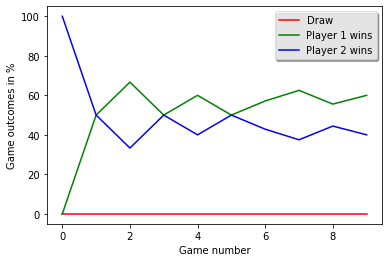

% of all actions used and associated states: 14.761904761904763%


{1: 6, 2: 4, 0: 0, 'move_count': 0}

In [133]:
episodes = 10
game = ConnectFourEnviroment(RLAgent, RLAgent, 0.8, 0.8)
game.play_multiple_games(episodes)

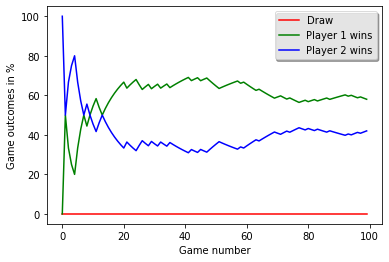

% of all actions used and associated states: 15.073329712112981%


{1: 58, 2: 42, 0: 0, 'move_count': 0}

In [145]:
episodes = 100
game = ConnectFourEnviroment(RLAgent, RLAgent, 0.8, 0.8)
game.play_multiple_games(episodes)

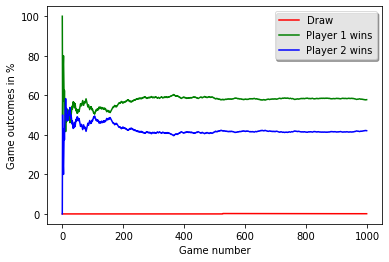

% of all actions used and associated states: 15.207945375543142%


{1: 578, 2: 421, 0: 1, 'move_count': 0}

In [143]:
episodes = 1000
game = ConnectFourEnviroment(RLAgent, RLAgent, 0.8, 0.8)
game.play_multiple_games(episodes)

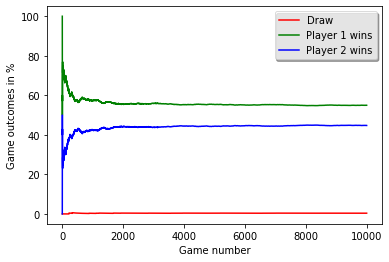

% of all actions used and associated states: 15.497381036931818%


{1: 5497, 2: 4466, 0: 37, 'move_count': 0}

In [138]:
episodes = 10000
game = ConnectFourEnviroment(RLAgent, RLAgent, 0.8, 0.8)
game.play_multiple_games(episodes)

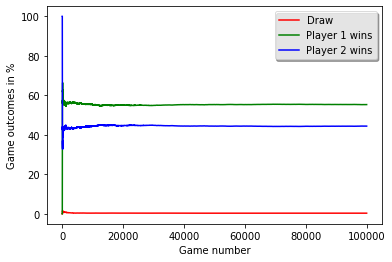

% of all actions used and associated states: 15.804506236268775%


{1: 55313, 2: 44314, 0: 373, 'move_count': 0}

In [139]:
episodes = 100000
game = ConnectFourEnviroment(RLAgent, RLAgent, 0.8, 0.8)
game.play_multiple_games(episodes)

### Live Demo:

  --------------
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
  --------------
  --------------
[[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
  --------------
  --------------
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  1.]]
  --------------
  --------------
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. -1.  0.  0.  0.  1.]]
  --------------
  --------------
[[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [-1.  0.  0.  0.  0.  0.  0.]
 [ 1.  0. -1.  0.  0.  0.  1

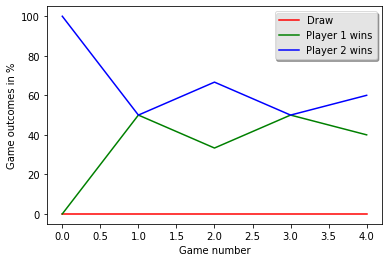

% of all actions used and associated states: 15.051020408163266%


{1: 2, 2: 3, 0: 0, 'move_count': 0}

In [27]:
episodes = 5
game = ConnectFourEnviroment(RLAgent, RLAgent, 0.8, 0.8)
game.play_multiple_games(episodes)

### ***Ergebnisse der Lösungsansätze***

***Ansatz 1***
<font size="2">
* ***q-table state space***: der q_table-Zustandsraum wächst, zeigt eine lineare Abhängigkeit von der Anzahl der Episoden, wie in den obigen Graphen dargestellt.
* ***Anzahl von Siegen***: der erste Spieler gewinnt mehr als der zweite Spieler und es gibt nur sehr wenige Episoden, in denen ein Unentschieden herauskommt.
* ***Lernen durch Agenten***: Da der Zustandsraum der connect4-Umgebung mit einer unteren Schranke von 16,000,000,000,000.0(<a href="https://web.stanford.edu/class/aa228/reports/2019/final106.pdf">gemäß dieser Forschungsarbeit</a>) sehr groß ist, wird bei 50000 Episoden nur ein Bruchteil des gesamten Zustandsraums mit Ansatz1 erforscht. Aus den Graphen lässt sich jedoch ablesen, dass die Agenten zu lernen scheinen, da die von den Agenten gesammelten durchschnittlichen Belohnungen auch bei 50000 Episoden zu steigen scheinen. </font>

***Ansatz 2***
<font size="2">
* ***q-table state space***: auch hier wächst der Zustandsraum, weshalb die Exploration zu funktionieren scheint
* ***Anzahl von Siegen***: ähnlich zu Ansatz 1
* ***Lernen durch Agenten***: Der Zustandsraum wurde, genauso wie im ersten Ansatz, sehr wenig erforscht. Ebenso haben wir im zweiten Ansatz erfahren, dass bei einem wachsendem Zustandsraum die Wahrscheinlichkeit des Wiederholens eines gleichen Zustandes weniger wird und somit auch die Chance auf verschiedene Varianten eines Zustandes geringer wird. Damit vervielfältigt sich auch die Anzahl an zu benötigten Episoden für gute Lernergebnisse. </font>

### ***Vielen Dank für die Aufmerksamkeit!***

### ***Quellen***

* https://medium.com/@carsten.friedrich/part-3-tabular-q-learning-a-tic-tac-toe-player-that-gets-better-and-better-fa4da4b0892a
* https://www.baeldung.com/cs/epsilon-greedy-q-learning
* https://web.stanford.edu/class/aa228/reports/2019/final106.pdf
* https://en.wikipedia.org/wiki/Q-learning
* https://www.geeksforgeeks.org/epsilon-greedy-algorithm-in-reinforcement-learning/
* https://blog.floydhub.com/an-introduction-to-q-learning-reinforcement-learning/

***Bildquellen:***
* https://www.baeldung.com/wp-content/uploads/sites/4/2020/12/q-learning-epsilon-greedy-1.png
* https://media.geeksforgeeks.org/wp-content/uploads/20200318200401/Screenshot-2020-03-18-at-8.03.38-PM.png
* https://media.geeksforgeeks.org/wp-content/uploads/20200316215850/Screenshot-2020-03-16-at-9.58.10-PM.png
* https://wikimedia.org/api/rest_v1/media/math/render/svg/678cb558a9d59c33ef4810c9618baf34a9577686
* https://www.baeldung.com/wp-content/uploads/sites/4/2020/12/q-learning-Q-table.png
* https://deeplizard.com/learn/video/my207WNoeyA
* https://deeplizard.com/images/MDP-diagram.jpg
* https://upload.wikimedia.org/wikipedia/commons/thumb/a/ad/Connect_Four.gif/220px-Connect_Four.gif
